In [120]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('dataset.csv')
df.head().T

In [ ]:
df.info()

In [123]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [124]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [125]:
df.TotalCharges.mode()[0]

' '

In [126]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [127]:
def fix_total_charges(row):
    if row['TotalCharges'] == ' ':
        return row['MonthlyCharges']
    else:
        return row['TotalCharges']
    
df['TotalCharges'] = df.apply(fix_total_charges, axis=1)

In [128]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [129]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [130]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [131]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1331256907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)


In [132]:
df.drop('customerID', axis=1, inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [133]:
df.TotalCharges.describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [134]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [135]:
len(df[df['TotalCharges']==' '])

0

In [136]:
# Convert the "TotalCharges" column to numeric and enforce white spaces to be 'NaN'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [137]:
len(df[df['TotalCharges']==' '])

0

In [138]:
# Just Confirm
df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [139]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

## Some Cleaning

In [140]:
df.columns = df.columns.str.lower()

In [141]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## Churn

In [142]:
df[df.churn == 'Yes']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


### Convert `churn` to Numerical Value

In [143]:
(df.churn == 'Yes').astype(int)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [144]:
df.churn = (df.churn == 'Yes').astype(int)

In [145]:
df.churn 

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [146]:
df.churn.value_counts()  #imbalance

churn
0    5174
1    1869
Name: count, dtype: int64

In [147]:
df.churn.value_counts(normalize= True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [148]:
df.churn.mean()

np.float64(0.2653698707936959)

In [149]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.2, random_state=1)
print("Training Data Size: ", df_train.shape)
print("Validation Data Size: ", df_valid.shape)
print("Testing Data Size: ", df_test.shape)

Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


In [150]:
df_train.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

count    4507.000000
mean     2237.668715
std      2248.499881
min        18.800000
25%       383.600000
50%      1359.000000
75%      3708.000000
max      8684.800000
Name: totalcharges, dtype: float64


<Axes: >

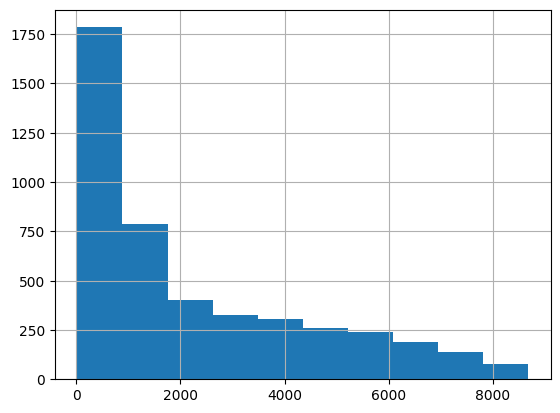

In [151]:
print(df_train['totalcharges'].describe())
df_train['totalcharges'].hist()

#### As the distribution of `totalcharges` is `skewed`, we can impute the missing values with its `median`

#### Note: we calculated the median of `totalcharges` from the `training set` and it will be used for other sets

In [152]:
df_train.totalcharges.isnull().sum()

np.int64(0)

In [153]:
df_valid.totalcharges.isnull().sum()

np.int64(0)

In [154]:
df_test.totalcharges.isnull().sum()

np.int64(0)

In [ ]:
# total_charges_median = df_train['totalcharges'].median()

# # Imputing 
# df_train['totalcharges'] = df_train['totalcharges'].fillna(total_charges_median)
# df_valid['totalcharges'] = df_valid['totalcharges'].fillna(total_charges_median)
# df_test['totalcharges'] = df_test['totalcharges'].fillna(total_charges_median)

# print(df_train.totalcharges.isnull().sum())
# print(df_valid.totalcharges.isnull().sum())
# print(df_test.totalcharges.isnull().sum())

# EDA

#### Note: EDA usually contains many visualizations, but actually we will make it simpler

In [155]:
df_train.select_dtypes(include=['object']).columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [156]:
categorical = list(df_train.select_dtypes(include=['object']).columns)
numerical = list(df_train.select_dtypes(include=['number']).columns)

In [157]:
numerical.remove('churn')

In [158]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [159]:
df_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance
``` It’s often done as a part of exploratory data analysis to figure out which variables will be useful for the model.```
 
```It also gives us additional insights about the dataset and helps answer questions like “What makes customers churn?” and “What are the characteristics of people who churn?”```

### Risk Ratio
> risk = group rate / global rate

* ` a group with a risk close to 1 is not risky at all`
* ` a group with a risk lower than 1:, the clients in this group are less likely to churn than clients in general`
* ` a group with a risk higher than 1: there’s more churn in the group than in the population, `

In [160]:
global_mean = df_train.churn.mean()
round(global_mean, 2)

np.float64(0.27)

In [161]:
df_train.groupby('gender')

In [162]:
df_train.groupby('gender')['churn'].mean()

gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64

In [163]:
churn_gender = df_train.groupby('gender').churn.mean()
churn_gender  # we can compare it with the global churn rate

gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64

> the difference between the rates is small, the value is not important when predicting churn because this group of customers is not really different from the rest of the customers. 

In [164]:
churn_partner = df_train.groupby('partner').churn.mean()
churn_partner

partner
No     0.325838
Yes    0.204651
Name: churn, dtype: float64

> the difference is not small, something inside that group sets it apart from the rest. A machine learning algorithm should be able to pick this up and use it when making predictions.

In [165]:
gender_risk = churn_gender / global_mean
gender_risk

gender
Female    1.023245
Male      0.976682
Name: churn, dtype: float64

In [166]:
partner_risk = churn_partner / global_mean
partner_risk

partner
No     1.215688
Yes    0.763545
Name: churn, dtype: float64

### Let's conclude `Risk Ratio` for all categorical features in tables

In [167]:
from IPython.display import display
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean']) 
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
Female,0.274258,0.00623,1.023245
Male,0.261778,-0.00625,0.976682


,mean,diff,risk
seniorcitizen,,,
0,0.241700,-0.026328,0.901773
1,0.401617,0.133590,1.498418


,mean,diff,risk
partner,,,
No,0.325838,0.057810,1.215688
Yes,0.204651,-0.063376,0.763545


,mean,diff,risk
dependents,,,
No,0.312599,0.044572,1.166295
Yes,0.164454,-0.103573,0.613572


,mean,diff,risk
phoneservice,,,
No,0.249438,-0.018589,0.930644
Yes,0.270064,0.002036,1.007598


,mean,diff,risk
multiplelines,,,
No,0.253358,-0.014669,0.945269
No phone service,0.249438,-0.018589,0.930644
Yes,0.289017,0.020990,1.078312


,mean,diff,risk
internetservice,,,
DSL,0.195232,-0.072796,0.728403
Fiber optic,0.421779,0.153752,1.573641
No,0.080080,-0.187947,0.298776


,mean,diff,risk
onlinesecurity,,,
No,0.419964,0.151937,1.566869
No internet service,0.080080,-0.187947,0.298776
Yes,0.151090,-0.116937,0.563712


,mean,diff,risk
onlinebackup,,,
No,0.396020,0.127992,1.477535
No internet service,0.080080,-0.187947,0.298776
Yes,0.221629,-0.046399,0.826888


,mean,diff,risk
deviceprotection,,,
No,0.392514,0.124486,1.464454
No internet service,0.080080,-0.187947,0.298776
Yes,0.229915,-0.038112,0.857804


,mean,diff,risk
techsupport,,,
No,0.416554,0.148526,1.554145
No internet service,0.080080,-0.187947,0.298776
Yes,0.159599,-0.108428,0.595458


,mean,diff,risk
streamingtv,,,
No,0.344674,0.076646,1.285964
No internet service,0.080080,-0.187947,0.298776
Yes,0.297376,0.029349,1.109498


,mean,diff,risk
streamingmovies,,,
No,0.338609,0.070582,1.263338
No internet service,0.080080,-0.187947,0.298776
Yes,0.304198,0.036170,1.134950


,mean,diff,risk
contract,,,
Month-to-month,0.432509,0.164482,1.613674
One year,0.115822,-0.152205,0.432128
Two year,0.027027,-0.241000,0.100837


,mean,diff,risk
paperlessbilling,,,
No,0.171566,-0.096462,0.640106
Yes,0.336495,0.068467,1.255448


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.164622,-0.103406,0.614197
Credit card (automatic),0.175620,-0.092408,0.655231
Electronic check,0.441215,0.173188,1.646157
Mailed check,0.199618,-0.068410,0.744767


### Very Useful Tables, but `Visualization` is better

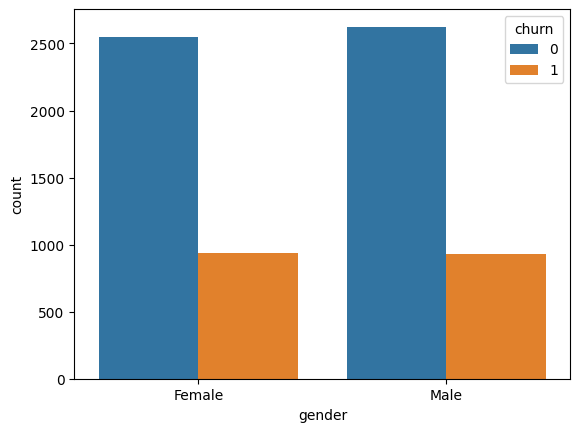

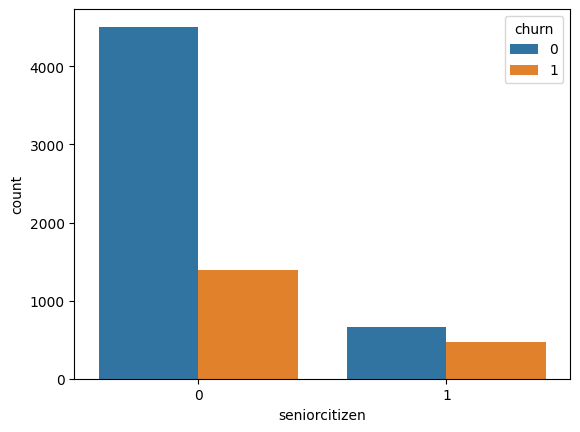

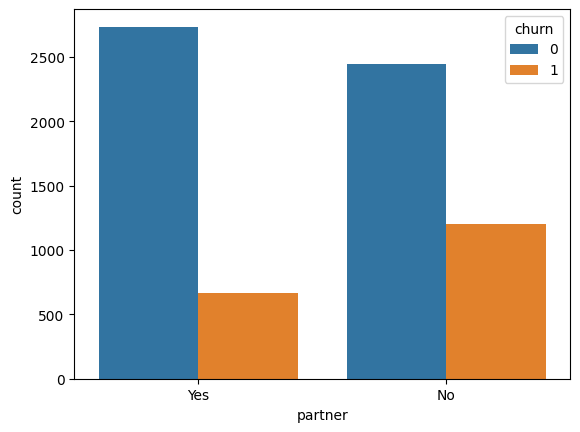

In [168]:
for feature in categorical[:3]:                                           
    _=sns.countplot(x= feature, hue = 'churn', data=df)
    plt.show()

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


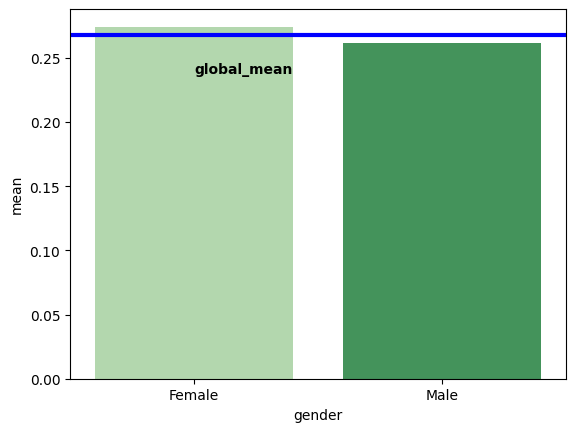

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


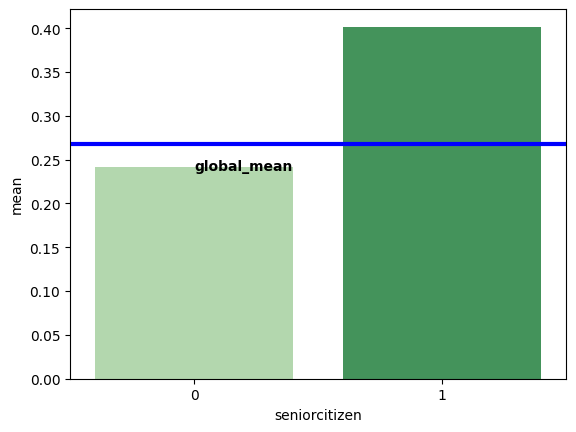

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


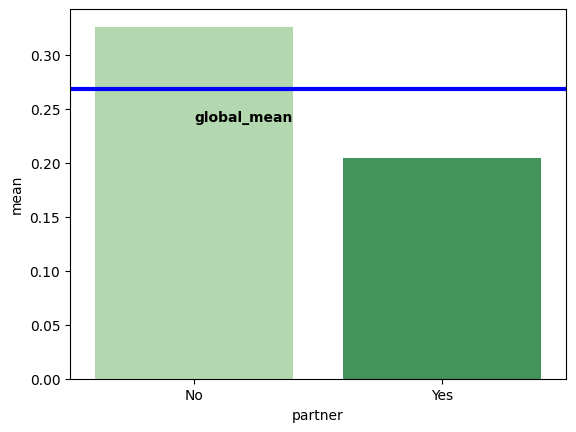

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


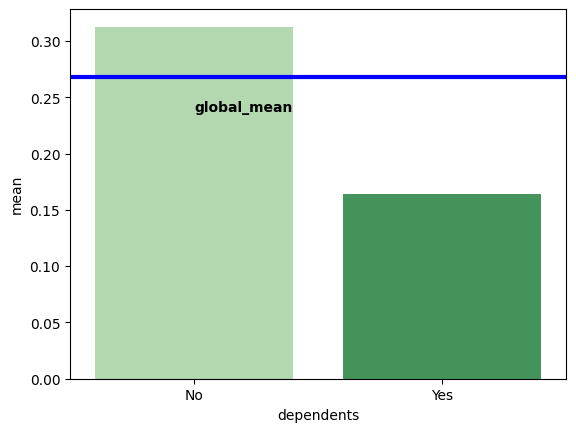

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


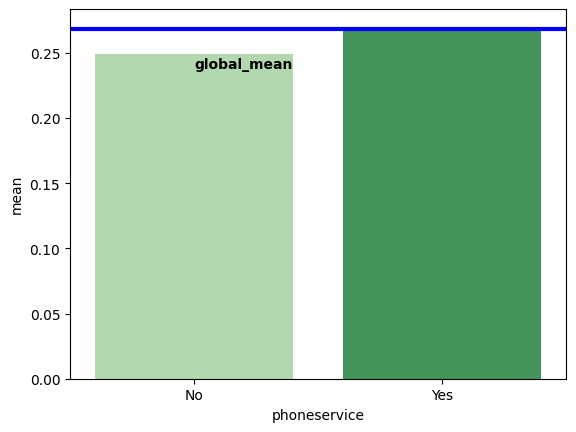

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


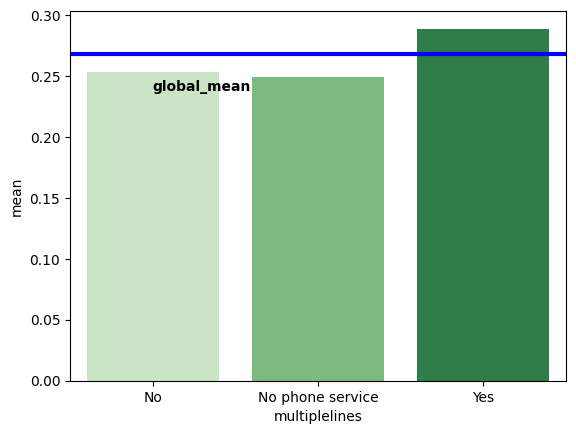

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


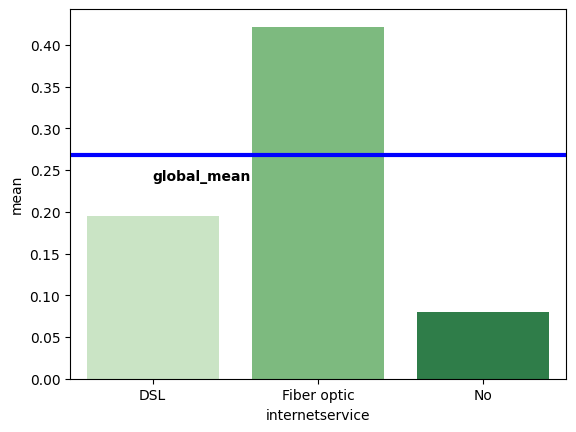

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


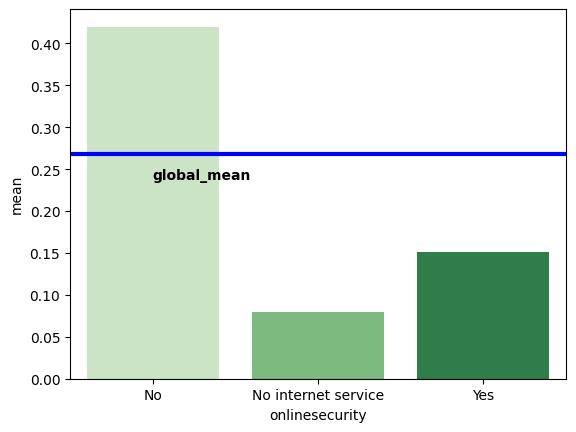

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


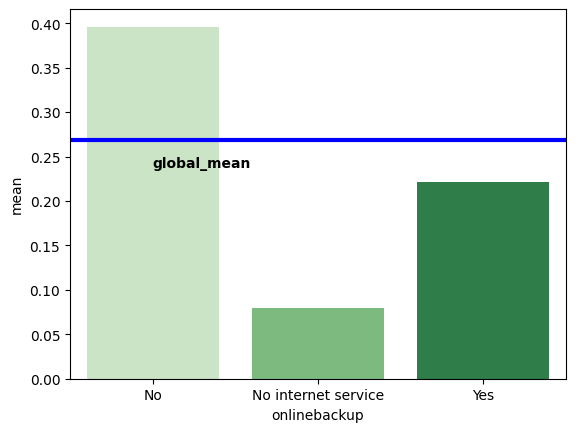

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


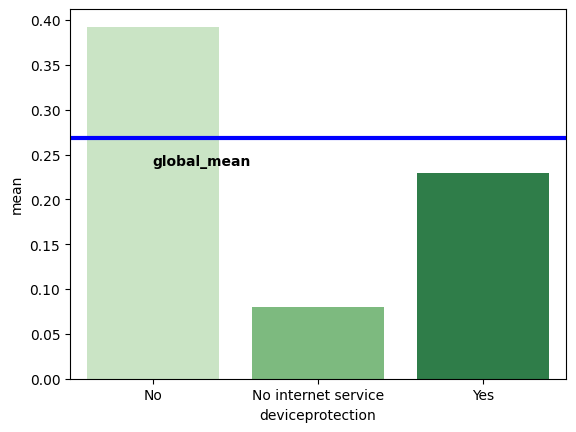

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


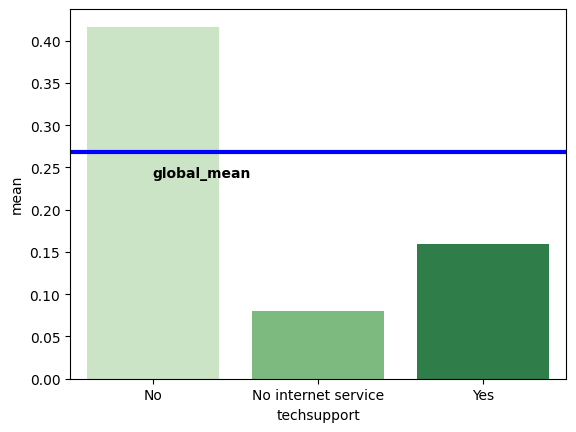

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


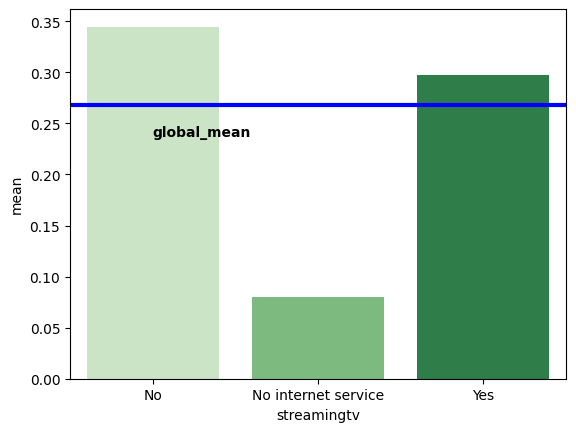

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


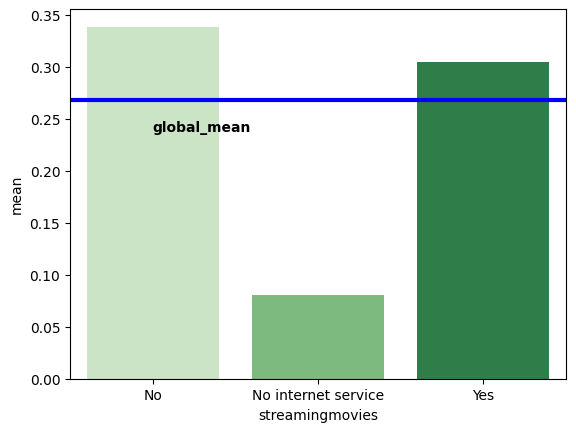

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


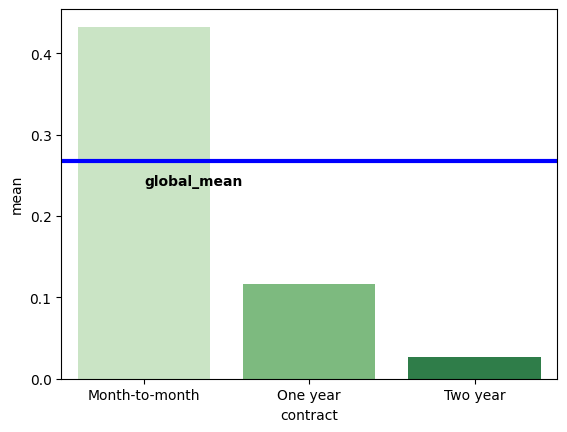

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


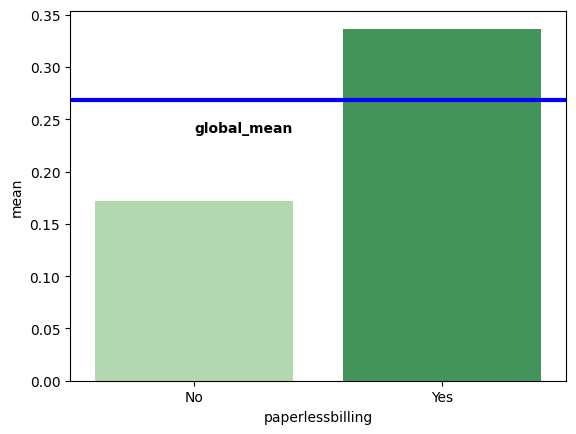

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\1294629217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')


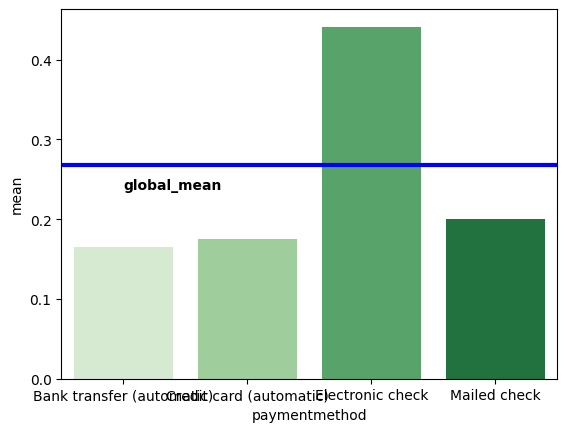

In [169]:
for feature in categorical:                                           
    df_group = df_train.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()

> ### Some Insights
* `For gender, there is not much difference between females and males.`

* Senior citizens tend to churn more than nonseniors.

* `People with a partner churn less than people with no partner.`

* People who use phone service are not at risk of churning. People who don’t use phone service are even less likely to churn.

* `Clients with no tech support tend to churn more than those who do.`

* People with monthly contracts cancel the contract a lot more often than others, and people with two-year contacts churn very rarely.

### Mutual Information
* More efficient to compare features importance
* Mutual information is a way to `quantify` the degree of dependency between two categorical variables, but it doesn’t work when one of the features is numerical
* `MI(feature;target) = Entropy(feature) - Entropy(feature|target)`
* Get more details about Information Gain and Mutual Information: [Click here](https://machinelearningmastery.com/information-gain-and-mutual-information/) and [here](https://towardsdatascience.com/select-features-for-machine-learning-model-with-mutual-information-534fe387d5c8)

In [170]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train.churn)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


,MI
partner,0.009443
seniorcitizen,0.008396
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


* `Higher values of mutual information mean a higher degree of dependence: if the mutual information between a categorical variable and the target is high, this categorical variable will be quite useful for predicting the target.` 

* `On the other hand, if the mutual information is low, the categorical variable and the target are independent, and thus the variable will not be useful for predicting the target.`

### Correlation Coefficient
* The correlation coefficient (Pearson’s correlation coefficient). It is a value from –1 to 1
* Positive correlation means that when one variable goes up, the other variable tends to go up as well `(In the case of a binary target, when the values of the variable are high, we see ones more often than zeros. But when the values of the variable are low, zeros become more frequent than ones.)`
* Zero correlation means no relationship between two variables: they are completely independent.
* Negative correlation occurs when one variable goes up and the other goes down. `(In the binary case, if the values are high, we see more zeros than ones in the target variable. When the values are low, we see more ones.)`

In [171]:
df[numerical].corrwith(df.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.198347
dtype: float64

#### Tenure
> The correlation between `tenure` and `churn` is –0.35: it has a negative sign, so the longer customers stay, the less often they tend to churn

In [172]:
t1 =df[df['tenure'] <= 2].churn.mean()
t1

np.float64(0.5835266821345708)

In [173]:
t2 = df[(df.tenure >= 3) & (df.tenure <= 12)].churn.mean()
t2 

np.float64(0.4033232628398791)

In [ ]:
t3 = df[df['tenure'] >= 12].churn.mean()
t3

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\2396895612.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');


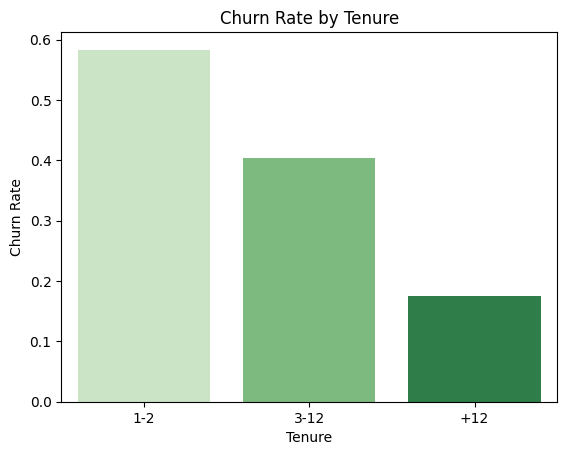

In [174]:
sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');
plt.title('Churn Rate by Tenure');
plt.xlabel('Tenure');
plt.ylabel('Churn Rate');

#### Monthly Charges
> `monthlycharges` has a positive coefficient of 0.19, which means that customers who pay more tend to leave more often. 

In [175]:
mc1 =df[df['monthlycharges'] <= 20].churn.mean()
mc1

np.float64(0.08841463414634146)

In [176]:
mc2 = df[(df.monthlycharges >= 21) & (df.monthlycharges <= 50)].churn.mean()
mc2

np.float64(0.22807017543859648)

In [177]:
mc3 = df[df['monthlycharges'] > 50].churn.mean()
mc3

np.float64(0.3178752107925801)

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\2360169293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');


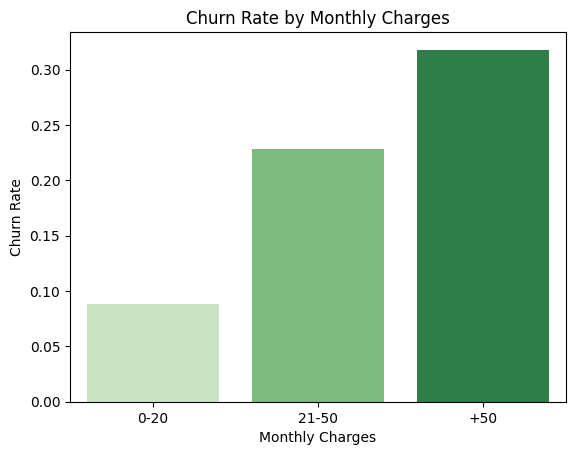

In [178]:
sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');
plt.title('Churn Rate by Monthly Charges');
plt.xlabel('Monthly Charges');
plt.ylabel('Churn Rate');

#### Total Charges
> `totalcharges` has a negative correlation, which makes sense: the longer people stay with the company, the more they have paid in total, so it’s less likely that they will leave.

In [179]:
tc1 = df[df['totalcharges'] <= 1000].churn.mean()
tc1

np.float64(0.36845730027548207)

In [180]:
tc2 = df[(df.totalcharges > 1000) & (df.totalcharges <= 5000)].churn.mean()
tc2

np.float64(0.2137150466045273)

In [181]:
tc3 = df[df['totalcharges'] > 5000].churn.mean()
tc3

np.float64(0.13832599118942732)

C:\Users\webde\AppData\Local\Temp\ipykernel_22580\3531471062.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =['0-1000', '1000-5000', '+5000'], y =[tc1,tc2,tc3], palette='Greens');


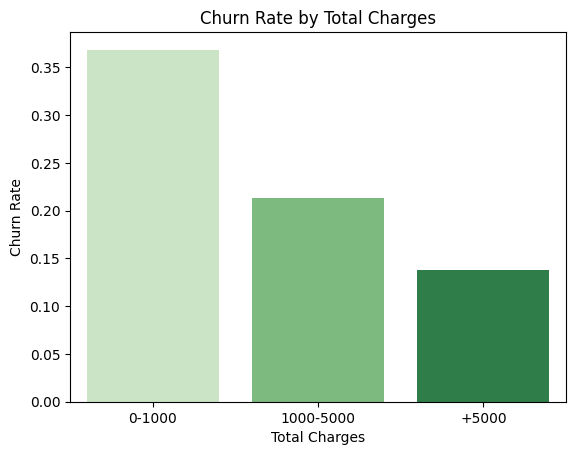

In [182]:
sns.barplot(x =['0-1000', '1000-5000', '+5000'], y =[tc1,tc2,tc3], palette='Greens');
plt.title('Churn Rate by Total Charges');
plt.xlabel('Total Charges');
plt.ylabel('Churn Rate');

### Note: We will try to train and evaluate our model with `all features` and with `most important ones` and compare both models

# Preprocessing

## Handling Categorical Variables `one-hot encoding`

In [183]:
# Applying one hot encoding using Pandas

df_train_enc= pd.get_dummies(df_train, drop_first=True)
df_train_enc.head()

,tenure,monthlycharges,totalcharges,churn,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2678,30,19.70,625.05,0,True,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,True
5594,23,83.75,1849.95,0,False,False,True,True,True,False,...,False,True,False,False,False,False,True,False,True,False
4077,14,95.80,1346.30,0,False,True,True,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4758,56,19.70,1051.90,0,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,False,False
4445,63,98.00,6218.45,0,False,False,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False


> ## Attention
* ### Test data should be set aside prior to preprocessing.
* ### Any statistics such as mean, min and max used for preprocessing should be derived from the training data. 
* ### Otherwise, there will be a data leakage problem.

In [184]:
# Applying one hot encoding using Sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                      verbose_feature_names_out=False)

train_enc = transformer.fit_transform(df_train)
df_train_enc = pd.DataFrame(train_enc, columns=transformer.get_feature_names_out())
df_train_enc

,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,...,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure,monthlycharges,totalcharges,churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,30.0,19.70,625.05,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,23.0,83.75,1849.95,0.0
2,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,14.0,95.80,1346.30,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,56.0,19.70,1051.90,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,63.0,98.00,6218.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,52.0,80.85,4079.55,0.0
4503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,18.0,25.15,476.80,0.0
4504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,90.00,190.05,1.0
4505,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,27.0,24.50,761.95,0.0


In [185]:
X_train = df_train_enc.drop('churn', axis=1)
y_train = df_train_enc['churn']

In [186]:
valid_enc = transformer.transform(df_valid)
df_valid_enc = pd.DataFrame(valid_enc, columns=transformer.get_feature_names_out())
X_valid = df_valid_enc.drop('churn', axis=1)
y_valid = df_valid_enc['churn']

test_enc = transformer.transform(df_test)
df_test_enc = pd.DataFrame(test_enc, columns=transformer.get_feature_names_out())
X_test = df_test_enc.drop('churn', axis=1)
y_test = df_test_enc['churn']

## Scaling Numerical Variables `Standard Scaler`

In [187]:
df_train[numerical].describe()

,tenure,monthlycharges,totalcharges
count,4507.000000,4507.000000,4507.000000
mean,32.001553,64.312536,2237.668715
std,24.558539,30.089423,2248.499881
min,0.000000,18.250000,18.800000
25%,8.000000,34.700000,383.600000
50%,28.000000,70.150000,1359.000000
75%,55.000000,89.575000,3708.000000
max,72.000000,118.350000,8684.800000


In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(df_train[numerical])

array([[-0.08151035, -1.48282956, -0.71727718],
       [-0.36657522,  0.64606159, -0.17245353],
       [-0.7330872 ,  1.04657898, -0.39647217],
       ...,
       [-1.22176983,  0.85379883, -0.91076096],
       [-0.20368101, -1.32328737, -0.65638538],
       [-0.93670496,  0.54967152, -0.66096672]], shape=(4507, 3))

In [189]:
# Transformers
def preprocess(df_train, df_valid, df_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    X_train = transformer.fit_transform(df_train[cat+num])
    X_valid = transformer.transform(df_valid[cat+num])
    X_test = transformer.transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()
   
    return X_train , X_valid, X_test, columns

In [190]:
X_train , X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, categorical)

In [191]:
X_train

array([[-0.08151035, -1.48282956, -0.71727718, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36657522,  0.64606159, -0.17245353, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7330872 ,  1.04657898, -0.39647217, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.22176983,  0.85379883, -0.91076096, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20368101, -1.32328737, -0.65638538, ...,  0.        ,
         1.        ,  0.        ],
       [-0.93670496,  0.54967152, -0.66096672, ...,  0.        ,
         1.        ,  0.        ]], shape=(4507, 30))

In [192]:
y_train = df_train['churn']
y_valid = df_valid['churn']
y_test = df_test['churn']

# Modelling
* We will use logistic regression as a classification model

 ## Logistic Regression in breif

* Logistic regression is a linear model, but unlike linear regression, it’s a classification model
* The output of logistic regression is probability; the probability that the observation is positive, or, in other words, the probability that y = 1. `For our case, it’s the probability that the customer will churn.`
* To be able to treat the output as a probability, we need to make sure that the predictions of the model always stay between zero and one. We use a special mathematical function for this purpose called `sigmoid`, and the full formula for the logistic regression model is:

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781617296819/files/OEBPS/Images/03_23-Equation_3-3.png)

* The sigmoid function maps any value to a number between zero and one. It’s defined this way:

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781617296819/files/OEBPS/Images/03_24.png)

 ### Linear Regression vs. Logistic Regression

```
def linear_regression(xi):
    result = bias
    for j in range(n):
        result = result + xi[j] * w[j]
    return result
```
******

```
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
    prob = sigmoid(score)
    return prob
```  

```
import math
def sigmoid(score):
    return 1 / (1 + math.exp(-score))
```

## Applying Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='liblinear', random_state=1)
model_1.fit(X_train, y_train)  # ====> Weights

LogisticRegression(random_state=1, solver='liblinear')

In [194]:
len(columns)

30

In [195]:
len(model_1.coef_[0])

30

In [196]:
y_val_pred = model_1.predict_proba(X_valid)
y_val_pred

array([[0.99290758, 0.00709242],
       [0.7985556 , 0.2014444 ],
       [0.78733305, 0.21266695],
       ...,
       [0.96166389, 0.03833611],
       [0.42030519, 0.57969481],
       [0.70279084, 0.29720916]], shape=(1127, 2))

In [197]:
y_test_pred = model_1.predict_proba(X_test)
y_test_pred

array([[0.94336093, 0.05663907],
       [0.91262626, 0.08737374],
       [0.66560117, 0.33439883],
       ...,
       [0.99479487, 0.00520513],
       [0.80573998, 0.19426002],
       [0.39358474, 0.60641526]], shape=(1409, 2))

In [198]:
y_test_pred[:,1]

array([0.05663907, 0.08737374, 0.33439883, ..., 0.00520513, 0.19426002,
       0.60641526], shape=(1409,))

> This output (probabilities) is often called `soft predictions`. These tell us the probability of churning as a number between zero and one. It’s up to us to decide how to interpret this number and how to use it.

> To get the binary predictions, `hard predictions`, we take the probabilities and cut them above a certain threshold

In [199]:
y_test_pred[:,1] > 0.5

array([False, False, False, ..., False, False,  True], shape=(1409,))

In [200]:
y_test_pred = (y_test_pred[:,1] > 0.5).astype(int)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [201]:
y_pred = model_1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [202]:
y_test_pred == y_test

3381     True
6180     True
4829     True
3737    False
4249     True
        ...  
2563     True
2028     True
2899     True
3474     True
5154     True
Name: churn, Length: 1409, dtype: bool

In [203]:
(y_test_pred == y_test).mean()

np.float64(0.8076650106458482)

In [204]:
print('LogisticRegression Training Accuracy: ', round(model_1.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_1.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_1.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.81
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.81


# Repeat Training and Evaluation for Most Important Features  

In [205]:
important_cat = df_mi.head().index.to_list()
important_cat

['contract',
 'onlinesecurity',
 'techsupport',
 'internetservice',
 'onlinebackup']

In [206]:
X_train, X_valid, X_test, columns = preprocess(df_train, df_valid, df_test, numerical, important_cat)

model_2 = LogisticRegression(solver='liblinear', random_state=1)
model_2.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_2.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_2.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_2.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.8


## Using Numerical Features Only

In [207]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [208]:
X_train = df_train[numerical]
X_valid = df_valid[numerical]
X_test  = df_test[numerical]

model_3 = LogisticRegression(solver='liblinear', random_state=1)
model_3.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_3.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_3.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_3.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.78
LogisticRegression Validation Accuracy:  0.79
LogisticRegression Testing Accuracy:  0.79


# Model Saving

In [209]:
import pickle 

pickle.dump(model_2, open("log_reg.pkl", 'wb'))

## Model Loading

In [210]:
loaded_model = pickle.load(open('log_reg.pkl', 'rb'))

## Model Usage

In [211]:
df_test[important_cat + numerical].iloc[10]

contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [212]:
# Transformers
def preprocess_fit(df_train, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    transformer.fit(df_train[cat+num])
    return transformer

In [213]:
transformer = preprocess_fit(df_train, numerical, important_cat)

In [214]:
df_test.iloc[10][important_cat + numerical]

contract           Month-to-month
onlinesecurity                 No
techsupport                    No
internetservice       Fiber optic
onlinebackup                  Yes
tenure                         32
monthlycharges              93.95
totalcharges              2861.45
Name: 407, dtype: object

In [215]:
pd.DataFrame(df_test.iloc[10][important_cat + numerical]).T

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
407,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [216]:
x =transformer.transform(pd.DataFrame(df_test.iloc[10][important_cat + numerical]).T)
x

array([[-6.32493609e-05,  9.85088758e-01,  2.77451870e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [217]:
loaded_model.predict(x)

array([0])

In [218]:
y_test.iloc[10]

np.int64(0)

In [220]:
x = df_test.iloc[10][important_cat + numerical].to_dict()

In [221]:
x

{'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [222]:
x = pd.DataFrame(x, index=[0])
x

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [223]:
transformer.transform(x)

array([[-6.32493609e-05,  9.85088758e-01,  2.77451870e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

## Transformer Saving

In [224]:
pickle.dump(transformer, open("transformer.pkl", 'wb'))

# Inference

In [225]:
trans = pickle.load(open('transformer.pkl', 'rb'))
model = pickle.load(open('log_reg.pkl', 'rb'))

In [226]:
cust ={'contract': 'Month-to-month',
 'onlinesecurity': 'No',
 'techsupport': 'No',
 'internetservice': 'Fiber optic',
 'onlinebackup': 'Yes',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [227]:
pd.DataFrame(cust, index=[0])

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
0,Month-to-month,No,No,Fiber optic,Yes,32,93.95,2861.45


In [228]:
cust = trans.transform(pd.DataFrame(cust, index=[0]))

In [229]:
cust

array([[-6.32493609e-05,  9.85088758e-01,  2.77451870e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [230]:
model.predict(cust)[0]

np.int64(0)

In [231]:
if model.predict(cust)[0] == 0:
    print('Not Churn')
else:
    print('Churn')

Not Churn


In [232]:
model.predict_proba(cust)[0][1]

np.float64(0.49701727913319277)

# Classification Metrics

In [233]:
from sklearn.metrics import classification_report

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1061
           1       0.61      0.45      0.52       348

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



<Axes: >

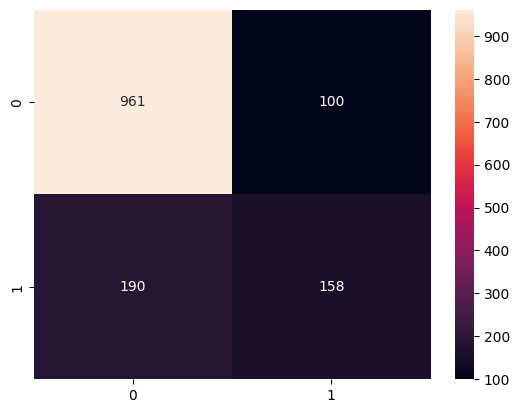

In [234]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot= True, fmt='0.0f')

In [235]:
cm

array([[961, 100],
       [190, 158]])

In [236]:
(Tn, Fp), (Fn, Tp) = cm

In [237]:
print('True Negative: ', Tn)
print('False Positive: ', Fp)
print('False Negative: ', Fn)
print('True Positive: ', Tp)


True Negative:  961
False Positive:  100
False Negative:  190
True Positive:  158


In [238]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))


Accuracy:  0.794180269694819
Precision:  0.6124031007751938
Recall:  0.4540229885057471
F1-Score:  0.5214521452145214


In [239]:
print('Precision: ', precision_score(y_test, y_pred, pos_label=0))


Precision:  0.8349261511728931


In [240]:
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))


Precision:  0.7799665901094444
